# Stock market analysis
## part 3. Technical indicators : bollinger bands

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.08.28 </div> 
<div style="text-align: right"> Last update: 2020.08.28</div> 

- 참고자료 1 : https://towardsdatascience.com/bollinger-bands-statistics-in-trading-dcc8783a8f88
- 참고자료 2 : https://www.pythonforfinance.net/2017/07/31/bollinger-band-trading-strategy-backtest-in-python/

볼린저밴드(Bollinger bands)는 미국의 재무 분석가인 존 볼린저가 개발한 기술분석 도구이다.  
1장의 기준에 따르면 볼린저밴드 **오버레이(Overlays), 그리고 후행지표(Lagging indicator)**에 속한다.  

이 방법은 이동평균선을 중심선으로 하여 상단밴드와 하단밴드를 구성한다. 예를 들어 20일 이동평균선을 사용할 경우 상단밴드, 하단밴드 계산식은 다음과 같다.  
- 중심선 : 20일 이동 평균
- 상단밴드 : 20일 이동 평균 + 20일 표준편차*k  
- 상단밴드 : 20일 이동 평균 - 20일 표준편차*k  
  (여기서 k는 상수이며 일반적으로 2를 사용한다.)  

과거의 주가 데이터를 분석했을 때 주가가 밴드 사이에 위치해 있는 경우가 95.4% 였다고 한다. 볼린저 밴드를 활용한 매매 기법은 여기에 착안한 것이다. 주가가 상단 밴드에 위치했을 때 매도를, 하단밴드에 위치했을 때 매수를 하는 전략이다. 

## 1. 데이터 가져오기

라이브러리 import
- 주식 일별 데이터를 가져오기 위해 `FinanceDataReader` 라이브러리를 사용한다.[[참고자료]](https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)  
- Yahoo finance를 사용하는 방법도 있으나 국내 주식 데이터 값이 부정확하다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import datetime
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

import FinanceDataReader as fdr

앞에서 구현한 기술지표 분석함수를 가져온다.  
이 함수에서 기능을 추가해 나갈 것이다.

In [2]:
# 이동평균을 구하는 함수
def calc_ma(df, numbers = 3, min_periods = None):
    windows = [5, 20, 60, 120]
    cols = ['5MA', '20MA', '60MA', '120MA']
    
    for i in range(0, numbers) :
        df[cols[i]] = df['Close'].rolling(window = windows[i], min_periods = min_periods).mean()
    
    return df

In [3]:
# 시각화 함수
def plot_stock(df, plot_ma = True, num_of_MAs = 3, title = 'Stock price chart'):
    fig, axes = plt.subplots(nrows=2, ncols=1,
                            gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
    
    axes[0].plot(df['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
    
    if plot_ma:
        windows = [5, 20, 60, 120]
        cols = ['5MA', '20MA', '60MA', '120MA']
        colors = ['g', 'r', 'orange', 'm']
        for i in range(0, num_of_MAs):
            axes[0].plot(df[cols[i]], c = colors[i], linestyle='--', alpha = 0.7, label = cols[i])
    
    axes[0].legend()

    x = np.arange(len(df.index)) # 바차트를 위해서 x 축 추가
    axes[1].get_xaxis().set_visible(False)
    axes[1].bar(x, df['Volume'], label = 'Volume')
    axes[1].legend()

    fig.suptitle(title, size=20)
    plt.setp(axes[0], title='Moving average Chart')
    plt.setp(axes[1], title='Volume chart')

    plt.show()

씨앤지하이테크(264660) 데이터를 가져온다.

In [4]:
stock = fdr.DataReader('264660', '2018-1-01', '2020-8-27')

데이터 확인

In [5]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-25,9300,10400,8550,9325,4254291,NaN
2018-01-26,9225,9575,9000,9175,765856,-0.016086
2018-01-29,9325,9800,9125,9125,661783,-0.005450
2018-01-30,9150,9325,8700,8700,418288,-0.046575
2018-01-31,8750,8925,8550,8675,224870,-0.002874


In [6]:
stock.shape

(637, 6)

In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 637 entries, 2018-01-25 to 2020-08-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    637 non-null    int64  
 1   High    637 non-null    int64  
 2   Low     637 non-null    int64  
 3   Close   637 non-null    int64  
 4   Volume  637 non-null    int64  
 5   Change  636 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 34.8 KB


이동평균 계산

In [8]:
stock = calc_ma(stock)

In [9]:
stock.head()

,Open,High,Low,Close,Volume,Change,5MA,20MA,60MA
Date,,,,,,,,,
2018-01-25,9300,10400,8550,9325,4254291,NaN,NaN,NaN,NaN
2018-01-26,9225,9575,9000,9175,765856,-0.016086,NaN,NaN,NaN
2018-01-29,9325,9800,9125,9125,661783,-0.005450,NaN,NaN,NaN
2018-01-30,9150,9325,8700,8700,418288,-0.046575,NaN,NaN,NaN
2018-01-31,8750,8925,8550,8675,224870,-0.002874,9000.0,NaN,NaN


차트 그려보기

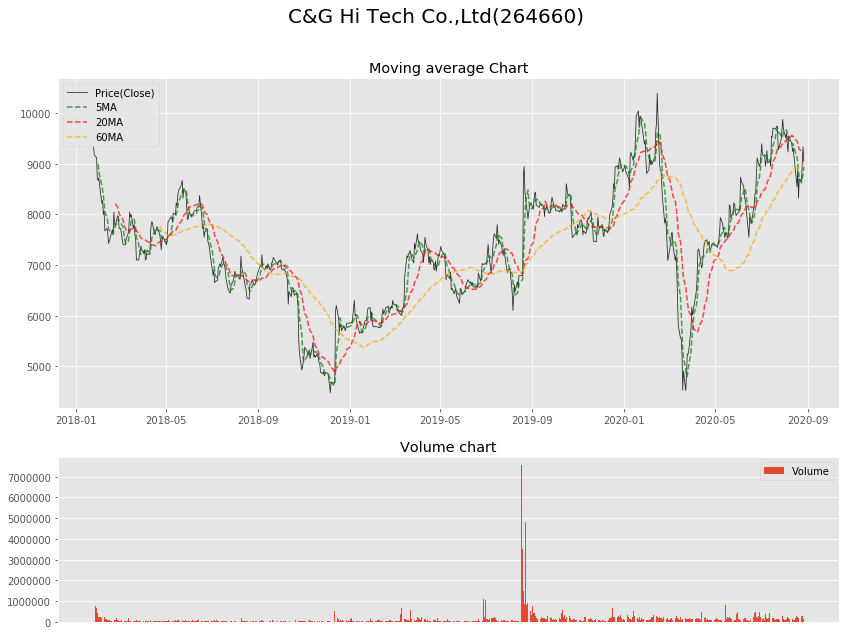

In [10]:
plot_stock(stock, plot_ma = True, num_of_MAs = 3, title = 'C&G Hi Tech Co.,Ltd(264660)')

## 2. 볼린저밴드 구현하기

### 2.1 상단선, 하단선 계산하기

상단선(Upper bound)과 하단선(Lower bound) 계산식은 다음과 같다. 
- 상단선 : 이동평균 + k*이동구간 표준편차  
- 하단선 : 이동평균 - k*이동구간 표준편차  

상단선 계산하기

In [11]:
stock['Upper'] = stock['20MA'] + 2*(stock['Close'].rolling(window = 20).std())

하단선 계산하기

In [12]:
stock['Lower'] = stock['20MA'] - 2*(stock['Close'].rolling(window = 20).std())

In [13]:
stock.head(30)

,Open,High,Low,Close,Volume,Change,5MA,20MA,60MA,Upper,Lower
Date,,,,,,,,,,,
2018-01-25,9300,10400,8550,9325,4254291,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-26,9225,9575,9000,9175,765856,-0.016086,NaN,NaN,NaN,NaN,NaN
2018-01-29,9325,9800,9125,9125,661783,-0.005450,NaN,NaN,NaN,NaN,NaN
2018-01-30,9150,9325,8700,8700,418288,-0.046575,NaN,NaN,NaN,NaN,NaN
2018-01-31,8750,8925,8550,8675,224870,-0.002874,9000.0,NaN,NaN,NaN,NaN
2018-02-01,8725,8925,8575,8725,221670,0.005764,8880.0,NaN,NaN,NaN,NaN
2018-02-02,8825,8900,8575,8575,222466,-0.017192,8760.0,NaN,NaN,NaN,NaN
2018-02-05,8250,8450,7975,8225,170873,-0.040816,8580.0,NaN,NaN,NaN,NaN
2018-02-06,7850,9150,7800,8275,528736,0.006079,8495.0,NaN,NaN,NaN,NaN


### 2.2 함수로 만들기  
앞장에서 만든 `calc_ma`와 `plot_stock` 함수에 추가한다.

In [14]:
# 이동평균을 구하는 함수
def calc_ma(df, numbers = 3, k = 2, min_periods = None):
    windows = [5, 20, 60, 120]
    cols = ['5MA', '20MA', '60MA', '120MA']
    
    for i in range(0, numbers) :
        df[cols[i]] = df['Close'].rolling(window = windows[i], min_periods = min_periods).mean()
        
    df['Upper'] = df[cols[1]] + (k*df['Close'].rolling(window = windows[i], min_periods = min_periods).std())
    df['Lower'] = df[cols[1]] - (k*df['Close'].rolling(window = windows[i], min_periods = min_periods).std())
    
    return df

In [15]:
# 시각화 함수
def plot_stock(df, plot_ma = True, plot_bb = True, num_of_MAs = 3, title = 'Stock price chart'):
    fig, axes = plt.subplots(nrows=2, ncols=1,
                            gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
    
    axes[0].plot(df['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
    
    if plot_ma:
        windows = [5, 20, 60, 120]
        cols = ['5MA', '20MA', '60MA', '120MA']
        colors = ['g', 'r', 'orange', 'm']
        for i in range(0, num_of_MAs):
            axes[0].plot(df[cols[i]], c = colors[i], linestyle='--', alpha = 0.7, label = cols[i])

    if plot_bb:
        axes[0].plot(df['Upper'], color = 'lightgray', alpha = 0.8, linewidth = 0.8, label = 'Upper band')
        axes[0].plot(df['Lower'], color = 'lightgray', alpha = 0.8, linewidth = 0.8, label = 'Lower band')
        axes[0].fill_between(df.index, df['Upper'], df['Lower'], alpha =0.2, color ='gray')
                
            
    axes[0].legend()

    x = np.arange(len(df.index)) # 바차트를 위해서 x 축 추가
    axes[1].get_xaxis().set_visible(False)
    axes[1].bar(x, df['Volume'], label = 'Volume')
    axes[1].legend()

    fig.suptitle(title, size=20)
    plt.setp(axes[0], title='Moving average Chart')
    plt.setp(axes[1], title='Volume chart')

    plt.show()

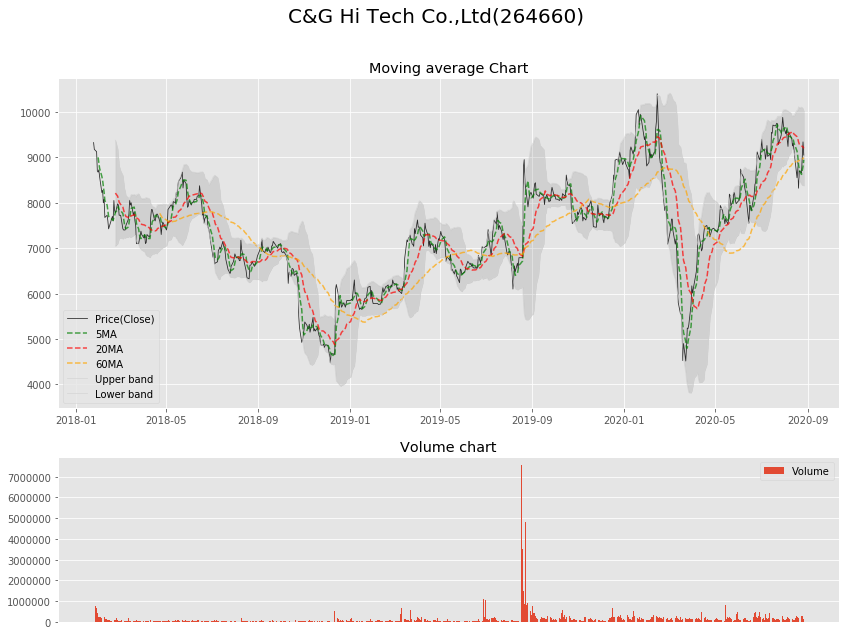

In [16]:
# 시험하기
plot_stock(stock, title = 'C&G Hi Tech Co.,Ltd(264660)')

## 3. 볼린저밴드를 활용한 매수/매도 시점 찾기 - 기본전략

- 볼린저밴드와 같이 상단, 하단 폭을 이용하여 매매시점을 결정하는 방법을 Envelope 방법이라고 한다.  
- 대부분의 경우 주가가 밴드 내에 위치한다는 가정하에 상단, 하단 경계를 저항선, 지지선을 보는 것이다.(또는 과매수, 과매도 구간)   
    - **매수시점 :** 주가가 밴드 하단선을 터치할 때  
    - **매도시점 :** 주가가 밴드 상단선을 터치할 때  
- 볼린저밴드의 폭으로 주식의 추세를 파악할 수도 있다.  
    - **박스권 장세 :** 가격의 등락폭이 적어 밴드의 폭이 좁아졌을 때
    - **변동성 장세 :** 가격의 등락폭이 커져서 밴드의 폭이 넓어졌을 때

<img src = 'https://raw.githubusercontent.com/sguys99/Stock-market-analysis/master/src/3.1.jpg' width = 1000>

[[그림 참고]](https://commodity.com/technical-analysis/bollinger-bands/)

## 4. 실제사례 살펴보기  
- 앞에서 소개한 `씨앤지하이테크`의 주가를 살펴본다.

데이터 읽어오기

In [17]:
stock = fdr.DataReader('264660', '2018-1-01', '2020-8-27')

함수선언

In [18]:
# 이동평균을 구하는 함수
def calc_ma(df, numbers = 3, k = 2, min_periods = None):
    windows = [5, 20, 60, 120]
    cols = ['5MA', '20MA', '60MA', '120MA']
    
    for i in range(0, numbers) :
        df[cols[i]] = df['Close'].rolling(window = windows[i], min_periods = min_periods).mean()
        
    df['Upper'] = df[cols[1]] + (k*df['Close'].rolling(window = windows[i], min_periods = min_periods).std())
    df['Lower'] = df[cols[1]] - (k*df['Close'].rolling(window = windows[i], min_periods = min_periods).std())
    
    return df

In [19]:
# 시각화 함수
def plot_stock(df, plot_ma = True, plot_bb = True, num_of_MAs = 3, title = 'Stock price chart'):
    fig, axes = plt.subplots(nrows=2, ncols=1,
                            gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
    
    axes[0].plot(df['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
    
    if plot_ma:
        windows = [5, 20, 60, 120]
        cols = ['5MA', '20MA', '60MA', '120MA']
        colors = ['g', 'r', 'orange', 'm']
        for i in range(0, num_of_MAs):
            axes[0].plot(df[cols[i]], c = colors[i], linestyle='--', alpha = 0.7, label = cols[i])

    if plot_bb:
        axes[0].plot(df['Upper'], color = 'lightgray', alpha = 0.8, linewidth = 0.8, label = 'Upper band')
        axes[0].plot(df['Lower'], color = 'lightgray', alpha = 0.8, linewidth = 0.8, label = 'Lower band')
        axes[0].fill_between(df.index, df['Upper'], df['Lower'], alpha =0.2, color ='gray')
                
            
    axes[0].legend()

    x = np.arange(len(df.index)) # 바차트를 위해서 x 축 추가
    axes[1].get_xaxis().set_visible(False)
    axes[1].bar(x, df['Volume'], label = 'Volume')
    axes[1].legend()

    fig.suptitle(title, size=20)
    plt.setp(axes[0], title='Moving average Chart')
    plt.setp(axes[1], title='Volume chart')

    plt.show()

이동평균 및 볼린저밴드 계산

In [20]:
stock = calc_ma(stock)

In [21]:
stock.head()

,Open,High,Low,Close,Volume,Change,5MA,20MA,60MA,Upper,Lower
Date,,,,,,,,,,,
2018-01-25,9300,10400,8550,9325,4254291,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-26,9225,9575,9000,9175,765856,-0.016086,NaN,NaN,NaN,NaN,NaN
2018-01-29,9325,9800,9125,9125,661783,-0.005450,NaN,NaN,NaN,NaN,NaN
2018-01-30,9150,9325,8700,8700,418288,-0.046575,NaN,NaN,NaN,NaN,NaN
2018-01-31,8750,8925,8550,8675,224870,-0.002874,9000.0,NaN,NaN,NaN,NaN


주가의 대부분이 밴드내에 있는지 확인하기

In [22]:
def get_stats(df):
    df = df.dropna()
    total = len(df)
    inside = ((df['Close'] <=df['Upper'])&(df['Close']>=df['Lower'])).sum()
    upside = (df['Close'] > df['Upper']).sum()
    downside = (df['Close']< df['Lower']).sum()
    i = np.round(inside / total * 100, 2)
    u = np.round(upside / total * 100, 2)
    d = np.round(downside / total * 100, 2)
    # Print the stats
    print("Total bars:", total)
    print("Inside: ", i, "%", sep="")
    print("Up side: ", u, "%", sep="")
    print("Down side: ", d, "%", sep="")

In [23]:
get_stats(stock)

Total bars: 578
Inside: 94.29%
Up side: 3.63%
Down side: 2.08%


In [24]:
((stock['Close'] <=stock['Upper'])&(stock['Close']>=stock['Lower'])).sum()

545

전체 데이터 시각화

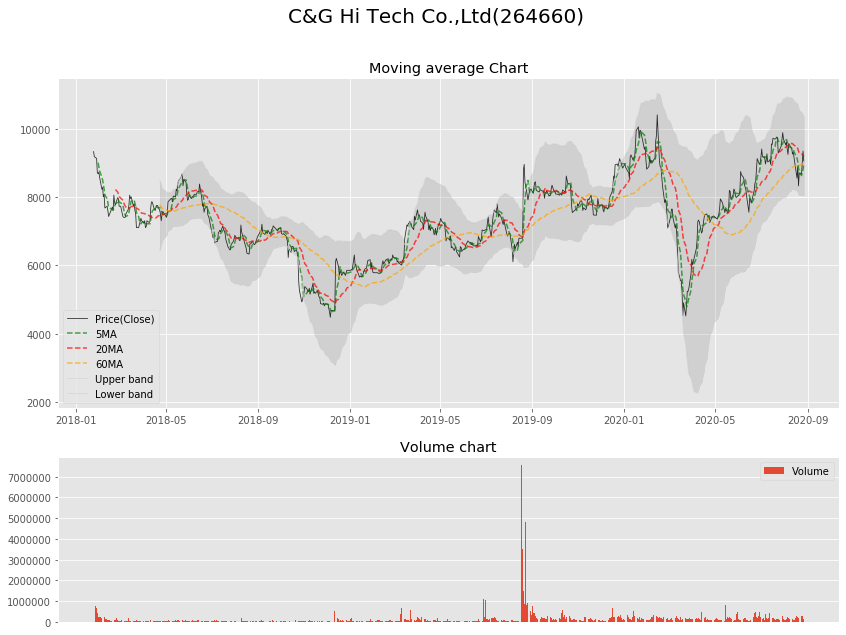

In [25]:
plot_stock(stock, title = 'C&G Hi Tech Co.,Ltd(264660)')

일부 구간 시각화 : 2019. 6 ~ 2020. 5

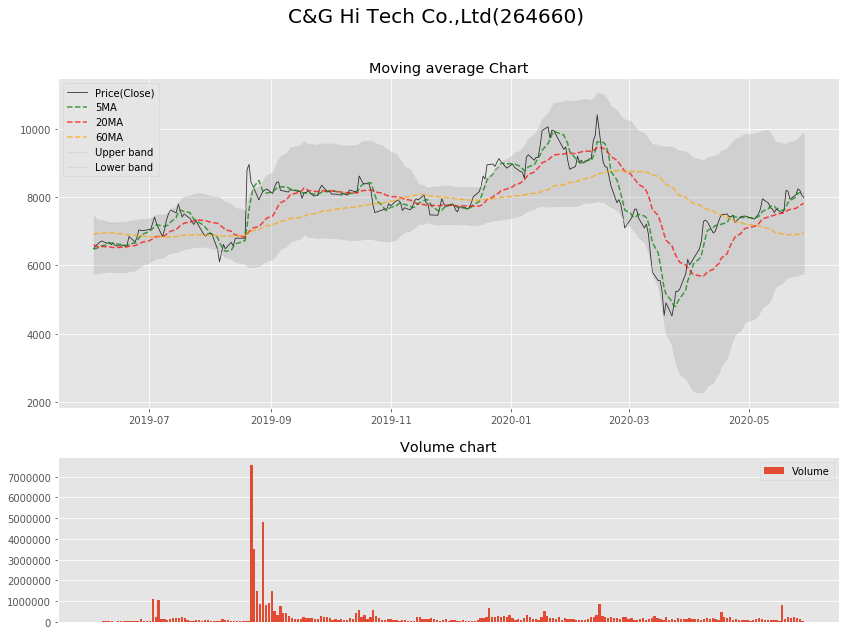

In [26]:
plot_stock(stock['2019-6':'2020-5'], title = 'C&G Hi Tech Co.,Ltd(264660)')

매수/ 매도시점 표시하기

In [27]:
import datetime as dt
import matplotlib.dates as mdates

In [28]:
buy = dt.datetime(2019, 8, 7)
sell = dt.datetime(2019, 12, 18)
stock_ranged = stock['2019-06':'2020-05']

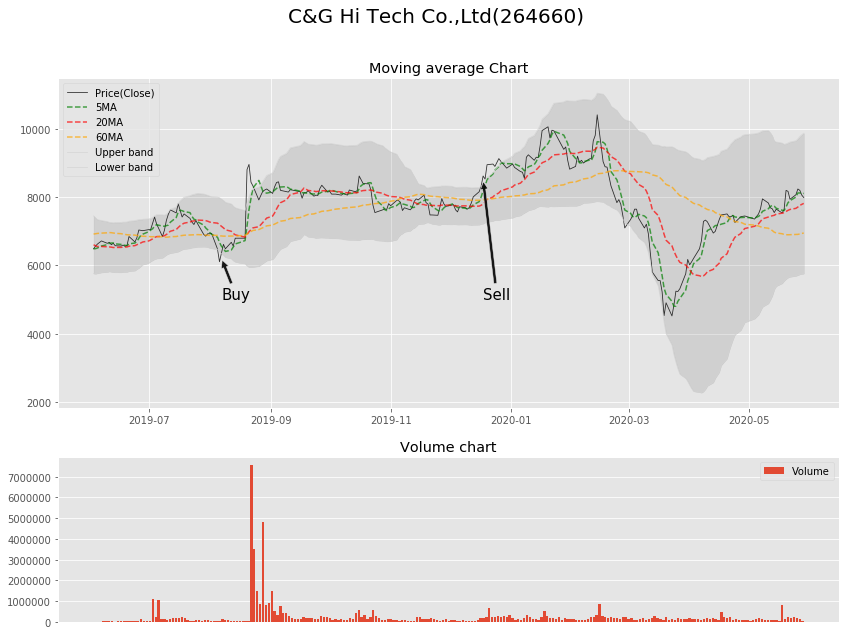

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1,
                        gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
axes[0].plot(stock_ranged['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
axes[0].plot(stock_ranged['5MA'], 'g--', alpha = 0.7, label = '5MA')
axes[0].plot(stock_ranged['20MA'], 'r--', alpha = 0.7, label = '20MA')
axes[0].plot(stock_ranged['60MA'], color = 'orange', linestyle = '--', alpha = 0.7, label = '60MA')

axes[0].plot(stock_ranged['Upper'], color = 'lightgray', alpha = 0.8, linewidth = 0.8, label = 'Upper band')
axes[0].plot(stock_ranged['Lower'], color = 'lightgray', alpha = 0.8, linewidth = 0.8, label = 'Lower band')
axes[0].fill_between(stock_ranged.index, stock_ranged['Upper'], stock_ranged['Lower'], alpha =0.2, color ='gray')

axes[0].annotate('Buy', xy = (mdates.date2num(buy), 6200), xytext = (mdates.date2num(buy), 5000),fontsize=15,
                 xycoords='data', textcoords='data',
                arrowprops=dict(facecolor='black', arrowstyle="simple", alpha = 0.9))
axes[0].annotate('Sell', xy = (mdates.date2num(sell), 8500), xytext = (mdates.date2num(sell), 5000),fontsize=15,
                 xycoords='data', textcoords='data',
                arrowprops=dict(facecolor='black', arrowstyle="simple", alpha = 0.9))
# 참고 : https://matplotlib.org/3.3.1/tutorials/text/annotations.html
axes[0].legend()

x = np.arange(len(stock_ranged.index)) # 바차트를 위해서 x 축 추가
axes[1].get_xaxis().set_visible(False)
axes[1].bar(x, stock_ranged['Volume'], label = 'Volume')
axes[1].legend()

fig.suptitle('C&G Hi Tech Co.,Ltd(264660)', size=20)
plt.setp(axes[0], title='Moving average Chart')
plt.setp(axes[1], title='Volume chart')

plt.show()

**기본 전략의 한계**  
- 가격이 급등락 할때는 추세가 분명하기 때문에 매매신호를 포착하기 쉽다.  
- 그러나 추세가 완만할 때는 매매신호가 분명하지 않다.  
- 후행 지표의 특성상 볼린저밴드만 단독으로 사용하는 것 보다 다른 지표들을 혼합해서 사용하는 것이 적절하다.

## 5. 볼린저밴드를 활용한 매수/매도 시점 찾기 - 개선된 전략

### 5.1 방법1 : 밴드폭 조정하기
밴드 폭을 2배로 늘려보자

In [30]:
stock = calc_ma(stock, k = 4)

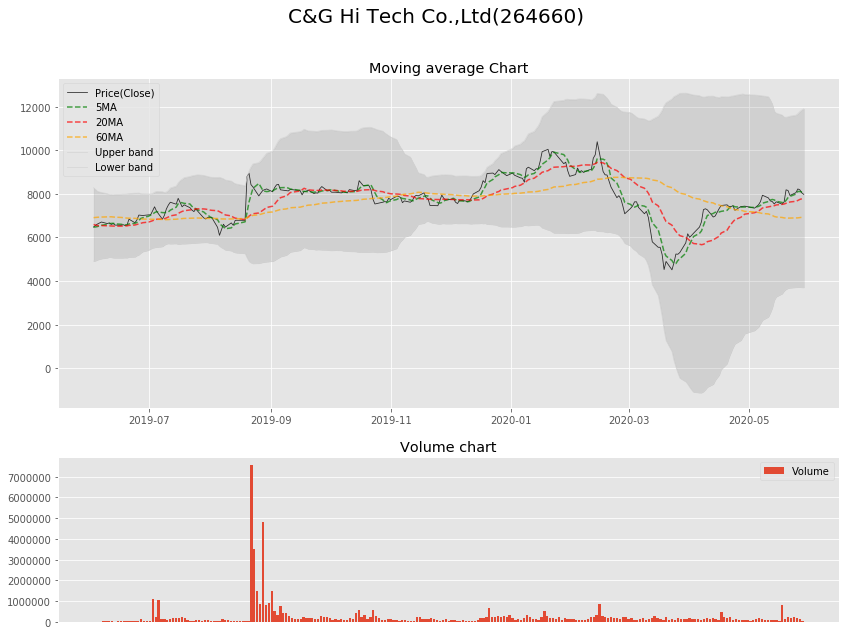

In [31]:
plot_stock(stock['2019-6':'2020-5'], title = 'C&G Hi Tech Co.,Ltd(264660)')

- 큰 효과는 없음  
- 밴드폭을 줄이고 늘려서 비교해볼 것(추후)

### 5.2 방법2 : 장세를 구분하여 대응하기
박스권 장세와 변동성 장세에 따라 다르게 활용한다.[[참고자료]](https://m.blog.naver.com/jnanda/221449242112)

#### 박스권 장세 : 주가가 횡보할 때

<img src = 'https://raw.githubusercontent.com/sguys99/Stock-market-analysis/master/src/3.2.jpg' width = 600>

밴드의 하단선을 지지선으로, 상단선을 저항선으로 사용한다.(하단선 상향 돌파할 때 매수, 상단선 깨고 내려올 때 매도)    
여기에 추가로 고려해야 할 사항은 다음과 같다.  
- 주가가 하단선을 상향 돌파하여 매수했지만, 중심선을 돌파하지 못하고, 내려와 하단선을 깨면 매도 : **case1**
- 주가가 하단선을 상향 돌파하여 매수했지만, 중심선 상향 돌파 후, 다시 중심선을 하향 돌파하면 매도 : **case2**  
- 주가가 하단선을 상향 돌파하여 매수 후, 상단선을 상향 돌파하고 내려오지 않으면 보유 : **case3**

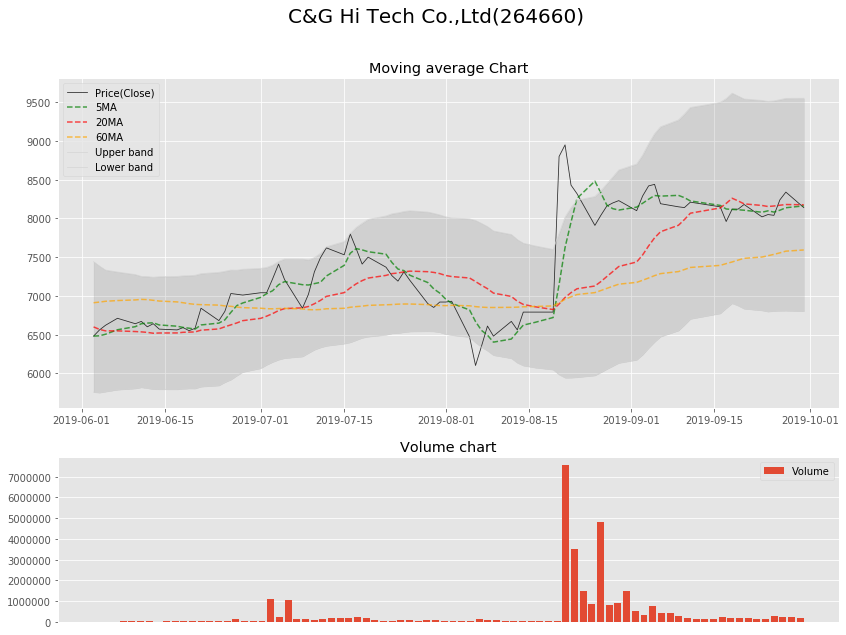

In [32]:
stock = calc_ma(stock, k = 2)
plot_stock(stock['2019-6':'2019-9'], title = 'C&G Hi Tech Co.,Ltd(264660)')

#### 변동성 장세 : 주가가 상승 또는 하락 추세일 때

<img src = 'https://raw.githubusercontent.com/sguys99/Stock-market-analysis/master/src/3.3.jpg' width = 600>

상승 추세일 때  
- 중심선이 지지선이 되고 상단선이 저항선이 됨  

하락 추세일 때  
- 주가가 중심선을 이탈하고 하락선에 도달하는 것으로 확인함

<img src = 'https://raw.githubusercontent.com/sguys99/Stock-market-analysis/master/src/3.4.jpg' width = 600>

단타매매 방법  
- 상승추세 일 때 : 지지선인 중심선 상향 돌파시 매수, 저항선인 상단선 터치 시 매도  
- 하락추세 일 때 : 지지선인 하단선 상승 돌파시 매수, 저항선인 중심선 터치 시 매도  
*단, 하락추세 에서는 가급적 추세 확인에만 활용하고 매매에 유의해야 한다.*

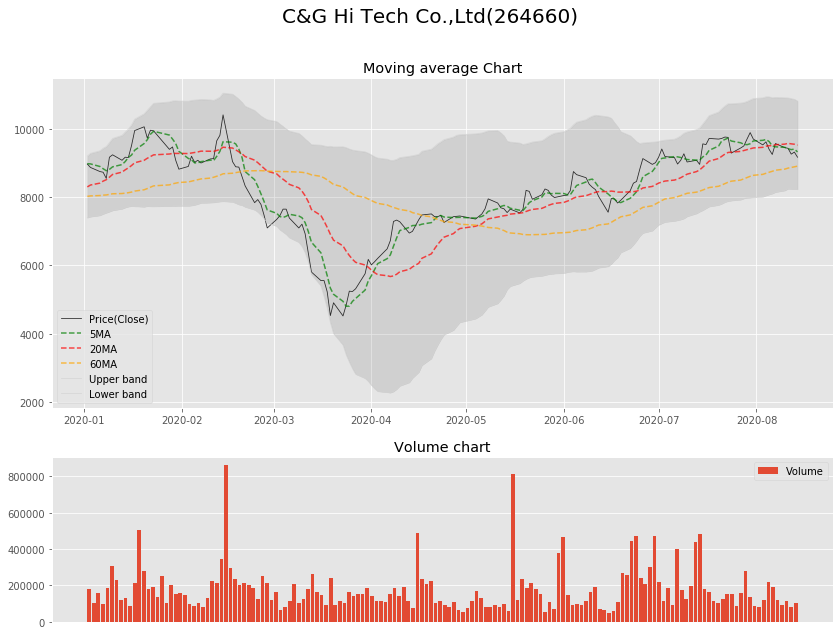

In [33]:
stock = calc_ma(stock, k = 2)
plot_stock(stock['2020-1':'2020-8-15'], title = 'C&G Hi Tech Co.,Ltd(264660)')

### 5.3 방법3 : 다른 지표와 함께 살펴보기  

- 주가가 하단선을 하향돌파할 때 거래량이 증가 하고 있으면 추세 하락으로 이어질 가능성이 높음  
- 주가가 상승할 때 거래량이 증가하면 매수시점으로 고려해볼 만함

In [35]:
stock['Volume_rate'] = stock['Volume'].diff()

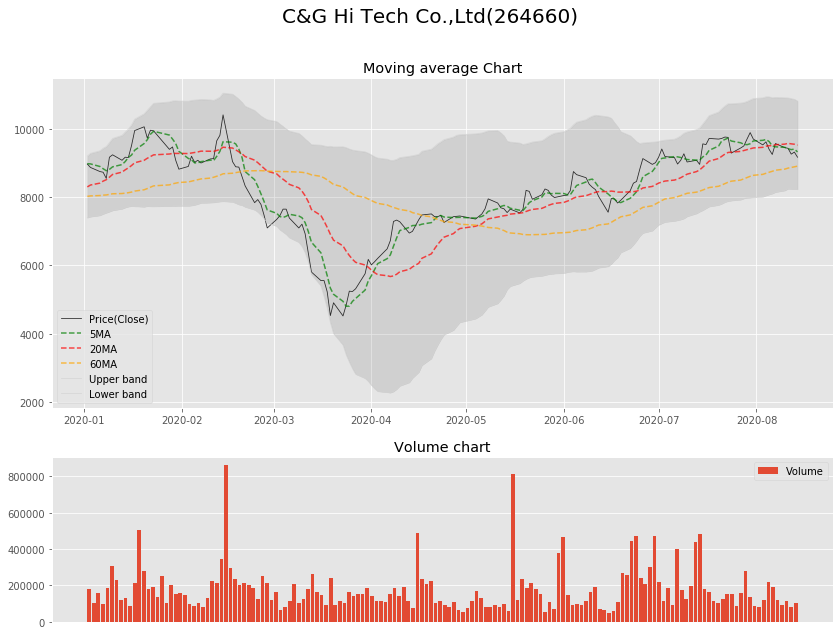

In [36]:
stock = calc_ma(stock, k = 2)
plot_stock(stock['2020-1':'2020-8-15'], title = 'C&G Hi Tech Co.,Ltd(264660)')

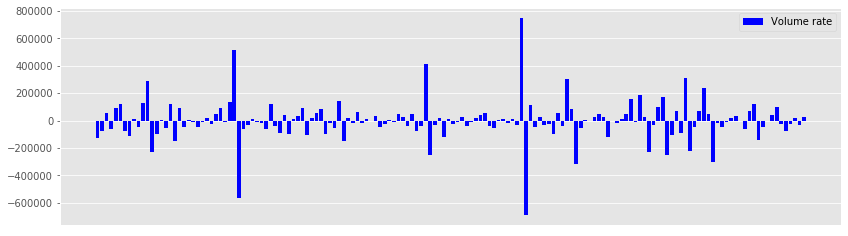

In [37]:
fig, ax = plt.subplots(figsize=(14, 4) )
x = np.arange(len(stock['2020-1':'2020-8-15'].index)) # 바차트를 위해서 x 축 추가
ax.get_xaxis().set_visible(False)
ax.bar(x, stock.loc['2020-1':'2020-8-15', 'Volume_rate'], label = 'Volume rate', color = 'b')
plt.legend()

그외 지지선과 저항선을 활용한 방법도 있다. [[참고자료]](https://commodity.com/technical-analysis/bollinger-bands/)  
(추후 해볼것 )

## 6. 향후계획  
- 매수/ 매도 시점을 자동으로 찾아내는 함수개발  
- 매수/ 매도구간 플로팅 함수 개발  
- 참고자료 : https://www.pythonforfinance.net/2017/07/31/bollinger-band-trading-strategy-backtest-in-python/
- 다음 장에서는 MACD와 Momentum에 대하여 살펴본다.